In [1]:
using Pkg; Pkg.activate("../../../../../")
using Revise, CausalityTools

  Activating project at `~/Code/Repos/Temp/CausalityTools.jl`


In [221]:
e1 = Exponential(0.3); e2 = Exponential(0.5)
n1 = Normal(0, 2); n2 = Normal(0, 3)
e = Renyi(q = 1.5, base = 2)
def = RenyiDifferentialCrossEntropy()

n = 1000
E1 = Dataset(rand(e1, n)); E2 = Dataset(rand(e2, n))
N1 = Dataset(rand(n1, n)); N2 = Dataset(rand(n2, n))

est = RenyiCrossEntropy(k = 3)
#est = RenyiCrossEntropyLord(k = 15)
entropy_cross(e, def, e1, e2)
a = entropy_cross(e, est, E1, E2)
#@show round.(a, digits = 2)


(i, a[i] ^ -0.5) = (1, 1.048543428780165)


DomainError: DomainError with -0.47965267675933654:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [207]:
λs = 0.1:0.2:1.5 |> collect
nreps = 20
theoretical_exp = zeros(length(λs))
estimated_exp = zeros(nreps, length(λs))
est = RenyiCrossEntropy(k = 4)
#est = RenyiCrossEntropyLord(k = 15)
def = RenyiDifferentialCrossEntropy()
e = Renyi(q = 1.3, base = 2)
n = 1000
for (i, λ) in enumerate(λs)
    eref = Exponential(1.0)
    etarg = Exponential(λ)
    theoretical_exp[i] = entropy_cross(e, def, eref, etarg)
    for j = 1:nreps
        ER, ET = Dataset(rand(eref, n)), Dataset(rand(etarg, n))
        estimated_exp[j, i] = entropy_cross(e, est, ER, ET)
    end
end


DomainError: DomainError with -1.2509872021458546:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

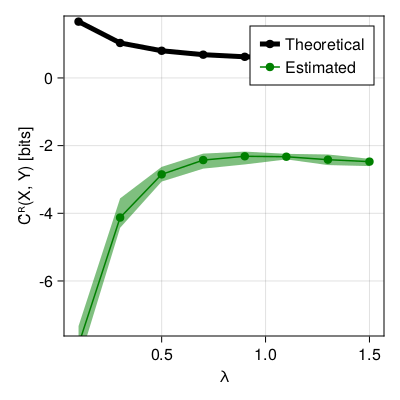

In [205]:
using Statistics
μ = [quantile(estimated_exp[:, i], 0.5) for i = 1:length(λs)]
lq = [quantile(estimated_exp[:, i], 0.025) for i = 1:length(λs)]
uq = [quantile(estimated_exp[:, i], 1 - 0.025) for i = 1:length(λs)]

using CairoMakie
f = Figure(resolution = (400, 400))
ax = Axis(f[1, 1], xlabel = "λ", ylabel = "Ĉᴿ(X, Y) [bits]")
ymin = minimum(minimum.([theoretical_exp, estimated_exp]))*0.9
ymax = maximum(maximum.([theoretical_exp, estimated_exp]))*1.1

ylims!(ax, (ymin, ymax))
scatterlines!(ax, λs, theoretical_exp, label = "Theoretical", color = :black, linewidth = 5)
scatterlines!(ax, λs, μ, label = "Estimated", color = :green)
band!(ax, λs, lq, uq, color = (:green, 0.5))
axislegend()
f